In [2]:
library(ggplot2)
library(tidyverse)
library(caTools)
library(dplyr)
library(sjPlot)
library(sjlabelled)
library(mlr)
library(rpart)

In [67]:
# load data
df <- read.csv("./tutorials/mental health in tech.csv")
summary(df)

  Timestamp              Age                Gender            Country         
 Length:1259        Min.   :-1.726e+03   Length:1259        Length:1259       
 Class :character   1st Qu.: 2.700e+01   Class :character   Class :character  
 Mode  :character   Median : 3.100e+01   Mode  :character   Mode  :character  
                    Mean   : 7.943e+07                                        
                    3rd Qu.: 3.600e+01                                        
                    Max.   : 1.000e+11                                        
    state           self_employed      family_history      treatment        
 Length:1259        Length:1259        Length:1259        Length:1259       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                              

In [68]:
# transform data type
df$Gender <- plyr::revalue(df$Gender,c('Female'='F', 'M'='M', 'Male'='M', 'male'='M', 'female'='F', 'm'='M', 'Male-ish'='M', 'maile'='M', 'Trans-female'='F',
 'Cis Female'='F', 'F'='F', 'something kinda male?'='M', 'Cis Male'='M', 'Woman'='M', 'f'='F', 'Mal'='M',
 'Male (CIS)'='M', 'queer/she/they'='M', 'non-binary'='F', 'Femake'='F', 'woman'='M', 'Make'='M', 'Nah'='F',
 'All'='F', 'Enby'='F', 'fluid'='F', 'Genderqueer'='F', 'Female '='F', 'Androgyne'='M', 'Agender'='M',
 'cis-female/femme'='F', 'Guy (-ish) ^_^'='M', 'male leaning androgynous'='M', 'Male '='M',
 'Man'='M', 'Trans woman'='F', 'msle'='M', 'Neuter'='F', 'Female (trans)'='F', 'queer'='F',
 'Female (cis)'='F', 'Mail'='M', 'cis male'='M', 'A little about you'='F', 'Malr'='M', 'p'='F', 'femail'='F',
 'Cis Man'='M', 'ostensibly male, unsure what that really means'='M'))
df$Gender <- factor(df$Gender, labels=c('F','M'))
df$Country <- as.factor(df$Country)
df$state <- as.factor(df$state)
df$self_employed <- as.factor(df$self_employed)
df$family_history <- as.factor(df$family_history)
df$treatment <- as.factor(df$treatment)
df$work_interfere <- as.factor(df$work_interfere)
df$no_employees <- as.factor(df$no_employees)
df$remote_work <- as.factor(df$remote_work)
df$tech_company <- as.factor(df$tech_company)
df$benefits <- as.factor(df$benefits)
df$care_options <- as.factor(df$care_options)
df$wellness_program <- as.factor(df$wellness_program)
df$seek_help <- as.factor(df$seek_help)
df$anonymity <- as.factor(df$anonymity)
df$leave <- as.factor(df$leave)
df$mental_health_consequence <- as.factor(df$mental_health_consequence)
df$phys_health_consequence <- as.factor(df$phys_health_consequence)
df$coworkers <- as.factor(df$coworkers)
df$supervisor <- as.factor(df$supervisor)
df$mental_health_interview <- as.factor(df$mental_health_interview)
df$phys_health_interview <- as.factor(df$phys_health_interview)
df$mental_vs_physical <- as.factor(df$mental_vs_physical)
df$obs_consequence <- as.factor(df$obs_consequence)

summary(df)

  Timestamp              Age             Gender             Country   
 Length:1259        Min.   :-1.726e+03   F: 257   United States :751  
 Class :character   1st Qu.: 2.700e+01   M:1002   United Kingdom:185  
 Mode  :character   Median : 3.100e+01            Canada        : 72  
                    Mean   : 7.943e+07            Germany       : 45  
                    3rd Qu.: 3.600e+01            Ireland       : 27  
                    Max.   : 1.000e+11            Netherlands   : 27  
                                                  (Other)       :152  
     state     self_employed family_history treatment   work_interfere
 CA     :138   No  :1095     No :767        No :622   Never    :213   
 WA     : 70   Yes : 146     Yes:492        Yes:637   Often    :144   
 NY     : 57   NA's:  18                              Rarely   :173   
 TN     : 45                                          Sometimes:465   
 TX     : 44                                          NA's     :264   
 (Othe

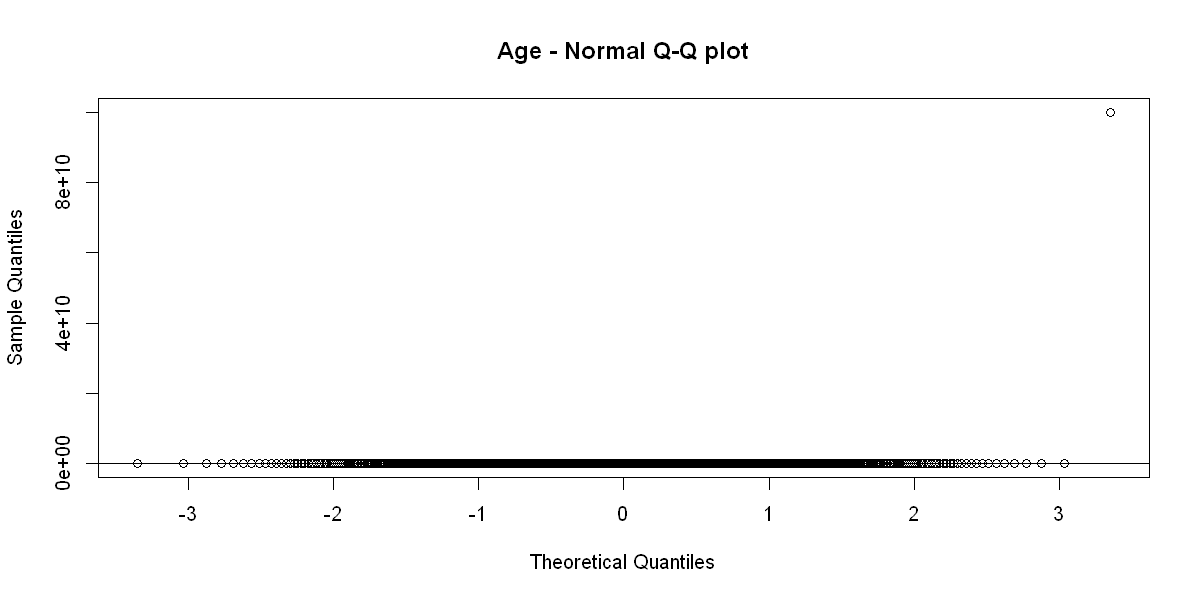

In [69]:
qqnorm(df$Age, main="Age - Normal Q-Q plot")
qqline(df$Age)

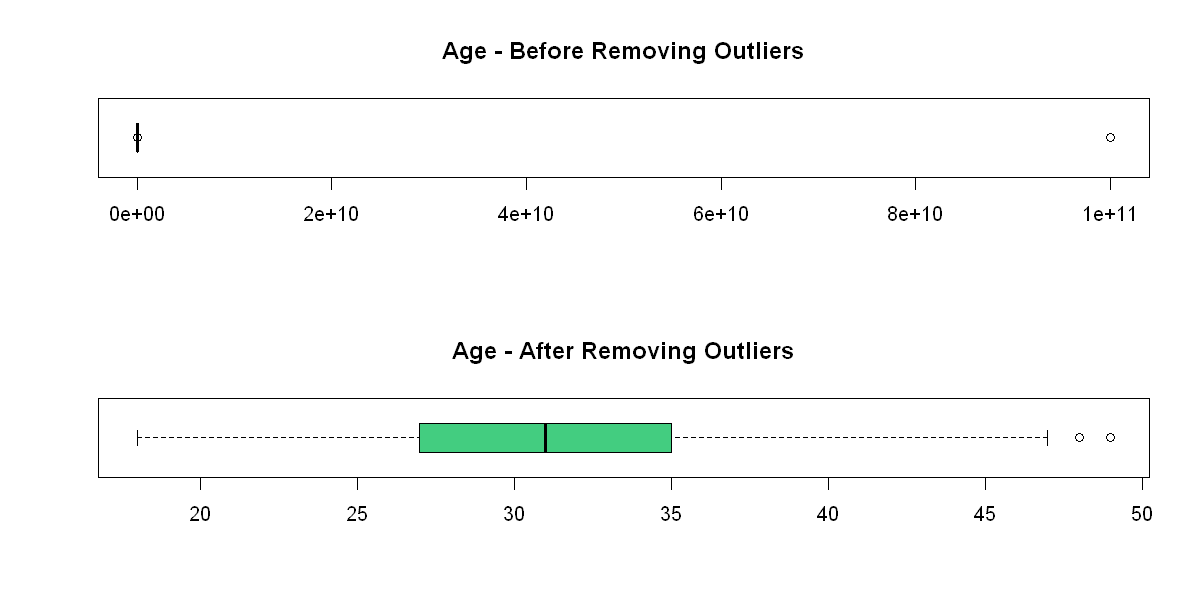

In [70]:
q <- quantile(df$Age, probs=c(.25, .75), na.rm = T)
iqr <- IQR(df$Age, na.rm = T)

df1 <- df %>% filter(Age > (q[1] - 1.5 * iqr) & Age < (q[2] + 1.5 * iqr))
par(mfrow=c(2,1))
options(repr.plot.width=10, repr.plot.height=5)
boxplot(df$Age, col='grey40', horizontal=T, main='Age - Before Removing Outliers')
boxplot(df1$Age, col='seagreen3', horizontal=T, main='Age - After Removing Outliers')

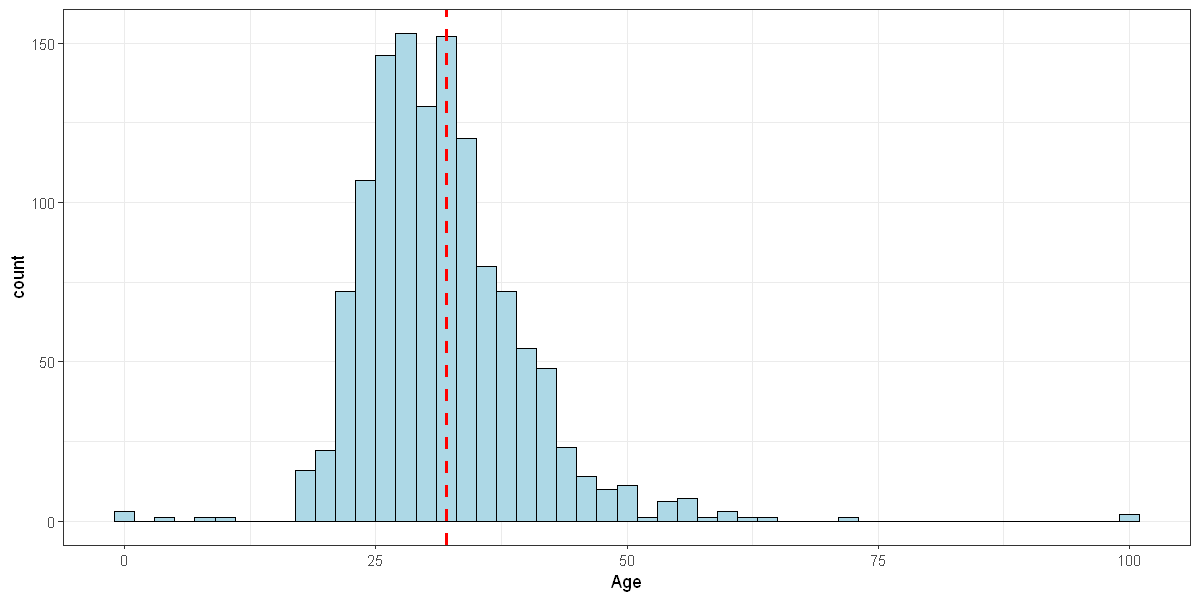

In [71]:
par(mfrow=c(1,1))
df[df[,"Age"]<0,"Age"] <- 0
df[df[,"Age"]>100, "Age"] <- 100
p <- ggplot(df,aes(Age)) 
p + geom_histogram(color="black", fill="lightblue", binwidth=2) + geom_vline(aes(xintercept=mean(Age)), color="red", linetype="dashed", size=1) + theme_bw()

In [ ]:
cols <- colnames(df)

# Make plots. 
bar_list <- list() 
rate_list <- list()
for (i in 1:27) {
  bar <- ggplot(df, aes_string(x=cols[i])) + geom_bar() + theme(axis.text.x = element_text(angle = 45, hjust = 0.5, vjust = 0.5))
  bar_list[[i]] <- bar 
  rate <- ggplot(df, aes_string(x=cols[i],fill='treatment')) + geom_bar(position='fill') + theme(axis.text.x = element_text(angle = 45, hjust = 0.5, vjust = 0.5))
  rate_list[[i]] <- rate
} 

# Save plots to jpg. Makes a separate file for each plot. 
for (i in 1:27) { 
  jpeg(filename = paste0("./images/",cols[i],"_barplot.jpg"), width = 600, height = 800,res = 300)
  print(bar_list[i]) 
  dev.off() 
} 
for (i in 1:27) { 
  jpeg(filename = paste0("./images/",cols[i],"_rateplot.jpg"), width = 1000, height = 600,res = 300)
  print(rate_list[i]) 
  dev.off() 
} 
dev.off() 

In [72]:
print(sapply(df, function(x) sum(is.na(x))))

                Timestamp                       Age                    Gender 
                        0                         0                         0 
                  Country                     state             self_employed 
                        0                       515                        18 
           family_history                 treatment            work_interfere 
                        0                         0                       264 
             no_employees               remote_work              tech_company 
                        0                         0                         0 
                 benefits              care_options          wellness_program 
                        0                         0                         0 
                seek_help                 anonymity                     leave 
                        0                         0                         0 
mental_health_consequence   phys_health_consequence 

In [73]:
round((sum(is.na(df))/nrow(df)))

[1] 2

In [14]:
missmap(df, main="Missing Map")

ERROR: Error in missmap(df, main = "Missing Map"): could not find function "missmap"


In [74]:
# reformat
cols <- colnames(df)
recols <- cols[-which(cols=='Timestamp'|cols=='state'|cols=='comments')]
df <- df[recols]

In [64]:
# delete the rows with NAs
df1 <- drop_na(df)
nrow(df1)

[1] 86

In [75]:
# create task and split dataset
library(mlbench)
mental <- createDummyFeatures(df1, target='treatment')
task <- makeClassifTask(data=mental, target='treatment')
holdout <- makeResampleInstance("Holdout", task)
task.train <- subsetTask(task, holdout$train.inds[[1]])
task.test <- subsetTask(task, holdout$test.inds[[1]])

Warning message:
"'Filter 'information.gain'' is deprecated.
Use 'Filter 'FSelector_information.gain' (package FSelector)' instead.
See help("Deprecated")"
Warning message:
"'Filter 'information.gain'' is deprecated.
Use 'Filter 'FSelector_information.gain' (package FSelector)' instead.
See help("Deprecated")"


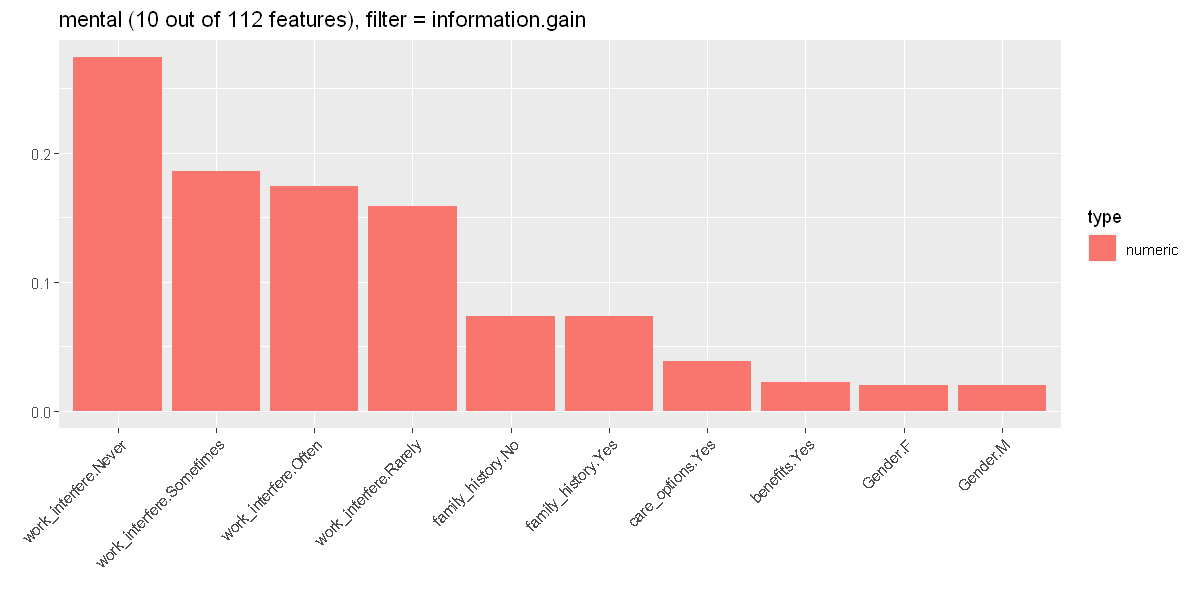

In [76]:
library(FSelector)
var_imp <- generateFilterValuesData(task, method = "information.gain")
var_imp <- generateFilterValuesData(task, method = c("information.gain"))
plotFilterValues(var_imp,n.show=10, feat.type.cols = TRUE)

## decision tree

In [77]:
# create classifier and evaluate performance
clf1 <- makeLearner("classif.rpart",predict.type='prob')
cv1 <- makeResampleDesc("CV",iters=5)
result1 <- resample(clf1, task.train, cv1, acc)

Resampling: cross-validation

Measures:             acc       

[Resample] iter 1:    0.7604790 

[Resample] iter 2:    0.7202381 

[Resample] iter 3:    0.7261905 

[Resample] iter 4:    0.7380952 

[Resample] iter 5:    0.7321429 




Aggregated Result: acc.test.mean=0.7354291






In [78]:
model1 <- train(clf1, task.train)
pred1 <- predict(model1, task.test)
calculateConfusionMatrix(pred1)

        predicted
true      No Yes -err.-
  No     143  53     53
  Yes     60 164     60
  -err.-  60  53    113

In [79]:
res1 <- performance(pred1, measures = list(fpr, fnr, auc))
res1

fpr       fnr       auc 
0.2678571 0.2704082 0.7659097

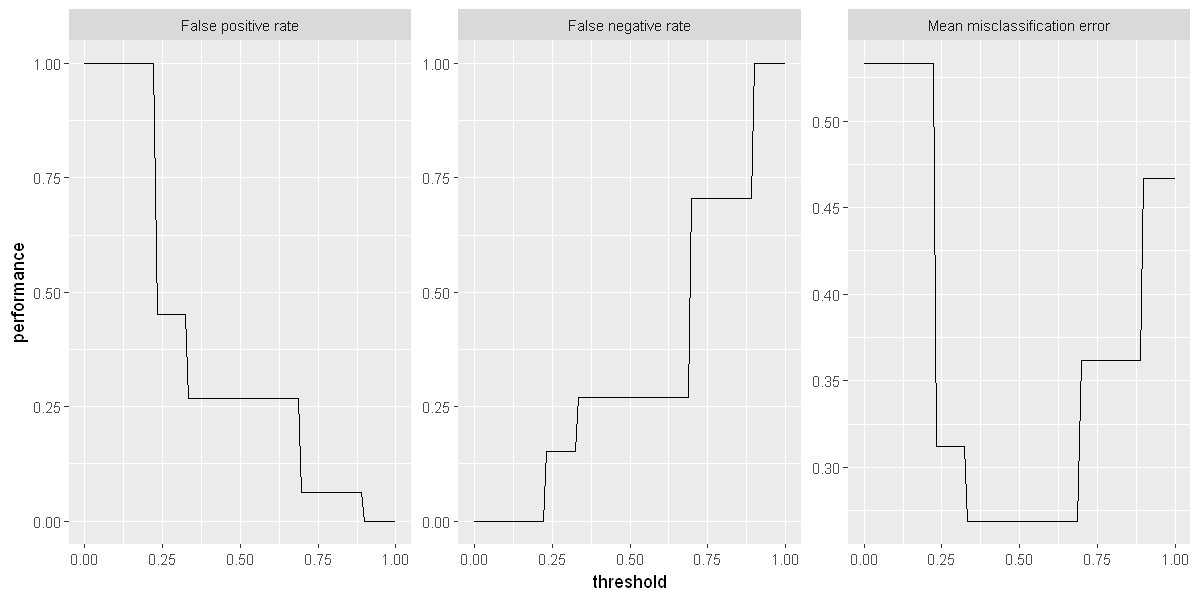

In [80]:
otp1 <- generateThreshVsPerfData(pred1, measures = list(fpr, fnr, mmce))
plotThreshVsPerf(otp1)

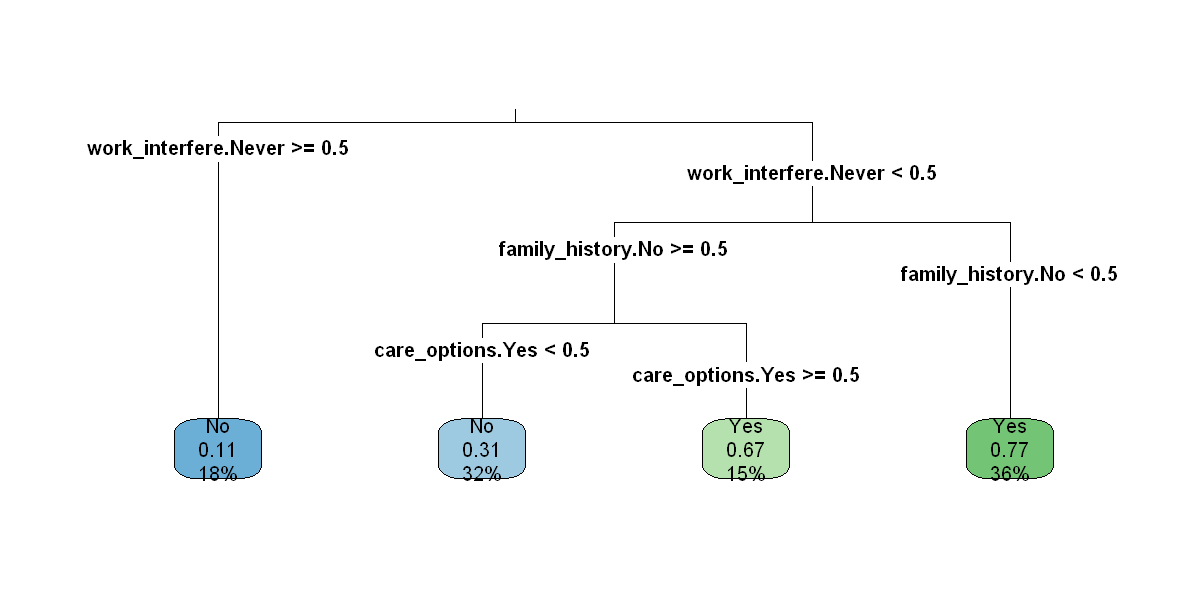

In [81]:
library(rpart.plot)
rpart.plot(model1$learner.model, roundint=FALSE, varlen=100, type = 3, clip.right.labs = FALSE, yesno = 2)

## random forest

In [73]:
# create classifier and evaluate performance
clf2 <- makeLearner("classif.randomForest",predict.type = "prob")
cv2 <- makeResampleDesc("CV",iters=5)
result2 <- resample(clf2, task.train, cv2, acc)

Resampling: cross-validation

Measures:             acc       

[Resample] iter 1:    0.7615385 

[Resample] iter 2:    0.7709924 

[Resample] iter 3:    0.8384615 

[Resample] iter 4:    0.8230769 

[Resample] iter 5:    0.7538462 




Aggregated Result: acc.test.mean=0.7895831






In [74]:
model2 <- train(clf2, task.train)
pred2 <- predict(model2, task.test)
calculateConfusionMatrix(pred2)

        predicted
true     No Yes -err.-
  No     65  59     59
  Yes    22 180     22
  -err.- 22  59     81

In [75]:
res2 <- performance(pred2, measures = list(fpr, fnr, auc))
res2

fpr       fnr       auc 
0.1089109 0.4758065 0.7950136

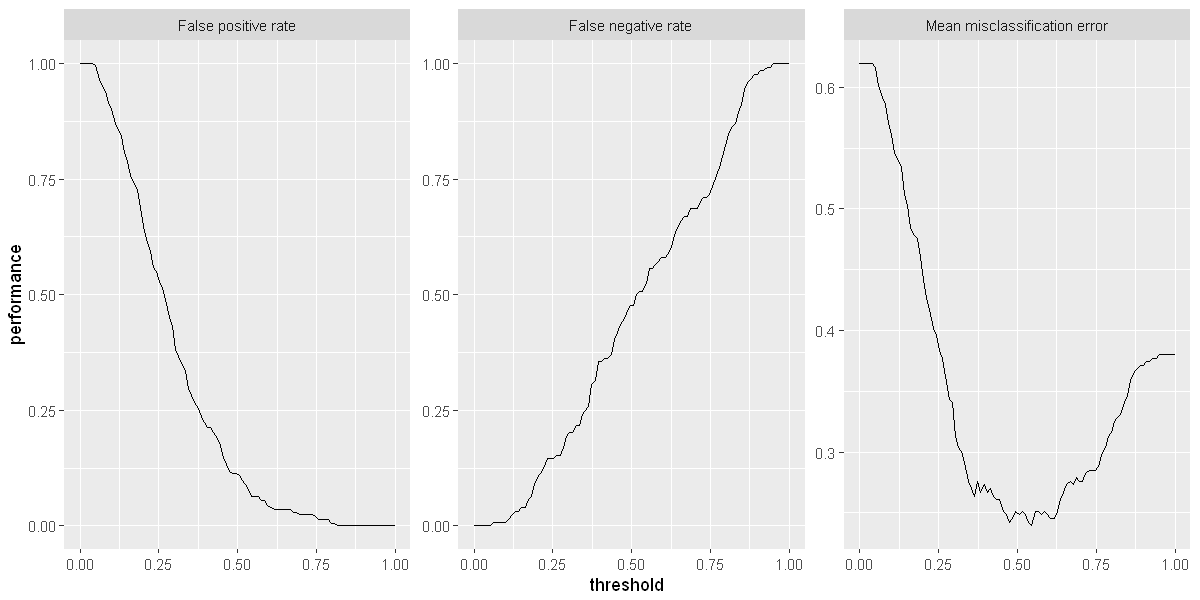

In [76]:
otp2 = generateThreshVsPerfData(pred2, measures = list(fpr, fnr, mmce))
plotThreshVsPerf(otp2)

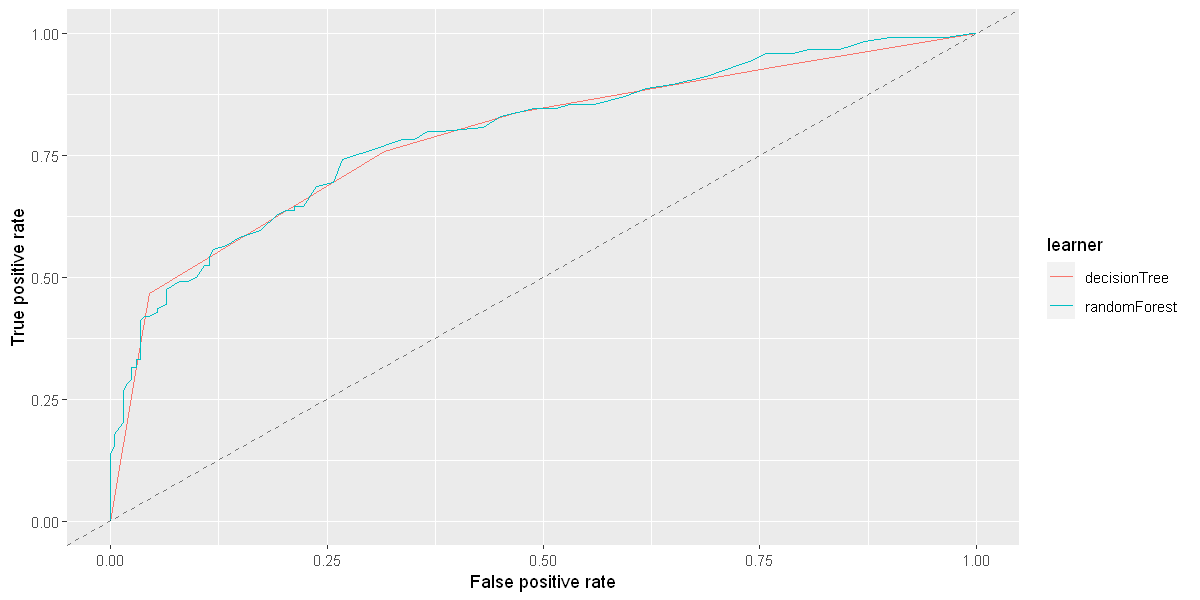

In [79]:
cur = generateThreshVsPerfData(list(decisionTree=pred1, randomForest=pred2), measures = list(fpr, tpr))
plotROCCurves(cur)